# Recreating the models in the paper:
## Discovering governing equations from data: Sparse identification of nonlinear dynamical systems


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import solve_ivp
from scipy.io import loadmat
from pysindy.utils import linear_damped_SHO
from pysindy.utils import cubic_damped_SHO
from pysindy.utils import linear_3D
from pysindy.utils import hopf
from pysindy.utils import lorenz

import pysindy as ps

# ignore user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

np.random.seed(1000)  # Seed for reproducibility

# Integrator keywords for solve_ivp
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

### Linear 2D ODE

Linear two-dimensional damped harmonic oscillator.

initial condtion $(2,0)$.

$$ \frac{d}{dt} \begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix} -0.1 & 2 \\ -2 & -0.1 \end{bmatrix} \begin{bmatrix}x \\ y\end{bmatrix} $$

this system is already implemented in `linear_damped_SHO`

In [ ]:
# Generating training data

dt = 0.01
t_train = np.arange(0, 25, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0]
x_train = solve_ivp(linear_damped_SHO, t_train_span, 
                    x0_train, t_eval=t_train, **integrator_keywords).y.T

In [ ]:
# Fit the model

poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(x_train, t=dt)


SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=5), feature_names=['x0', 'x1'],
      optimizer=STLSQ(threshold=0.05))

In [ ]:
model.print()

(x0)' = -0.100 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1


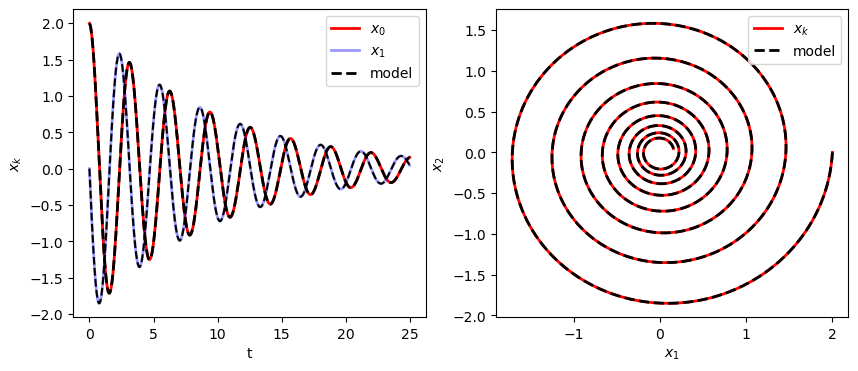

In [ ]:
# Simulate and plot the results

x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

### Cubic 2D ODE

This example involves cubic dynamics. The governing system used to generate training data is as follows. It is identical to the previous example except the linear terms in the right-hand side have been replaced with cubic ones.



$$ \frac{d}{dt}\begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}-0.1 & 2 \\ -2 & -0.1 \end{bmatrix} \begin{bmatrix}x^3 \\ y^3\end{bmatrix} $$

this system is already implemented in `cubic_damped_SHO`

In [ ]:
# Generate training data

dt = 0.01
t_train = np.arange(0, 25, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0]
x_train = solve_ivp(cubic_damped_SHO, t_train_span, 
                    x0_train, t_eval=t_train, **integrator_keywords).y.T# Fit the model


In [ ]:
# Fit the model

poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(x_train, t=dt)
model.print()

(x0)' = -0.100 x0^3 + 1.999 x1^3
(x1)' = -1.999 x0^3 + -0.100 x1^3


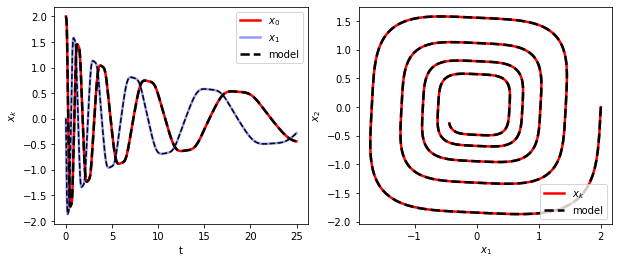

In [ ]:
# Simulate and plot the results

x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2.5)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

### Linear 3D ODE

The governing equations are given by the following system.

$$ \frac{d}{dt}\begin{bmatrix}x \\ y \\ z \end{bmatrix} = \begin{bmatrix}-0.1 & -2 & 0 \\ 2 & -0.1 & 0 \\ 0 & 0 & -0.3 \end{bmatrix} \begin{bmatrix}x \\ y \\ z \end{bmatrix} $$

this is implemented in `linear_3D`

In [ ]:
# Generate training data

dt = .01
t_train = np.arange(0, 50, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0, 1]
x_train = solve_ivp(linear_3D, t_train_span, 
                    x0_train, t_eval=t_train, **integrator_keywords).y.T

In [ ]:
# Fit the model

poly_order = 5
threshold = 0.01

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x_train, t=dt)
model.print()

(x0)' = -0.100 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1
(x2)' = -0.300 x2


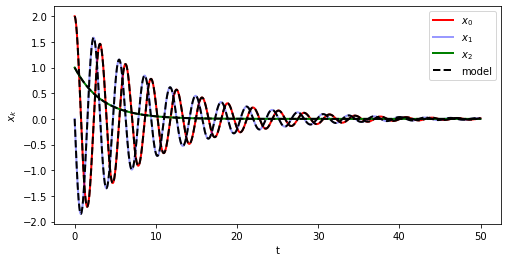

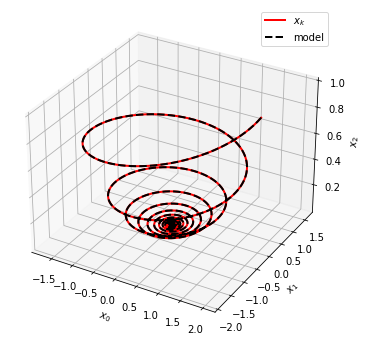

In [ ]:
# Simulate and plot the results

x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig = plt.figure(figsize=(8, 4))
plt.plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
plt.plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
plt.plot(t_train, x_train[:, 2], "g", label="$x_2$", **plot_kws)
plt.plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
plt.plot(t_train, x_sim[:, 1], "k--", **plot_kws)
plt.plot(t_train, x_sim[:, 2], "k--", **plot_kws)
plt.legend()
plt.xlabel("t")
plt.ylabel("$x_k$")
fig.show()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x_train[:, 0], x_train[:, 1], x_train[:, 2], "r", label="$x_k$", **plot_kws)
ax.plot(x_sim[:, 0], x_sim[:, 1], x_sim[:, 2], "k--", label="model", **plot_kws)
ax.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$")
ax.legend()
fig.show()

## Lorenz system (nonlinear ODE, chaotic dynamics)

The Lorenz system is given by

$$ \begin{aligned} \dot x &= \sigma(y-x)\\ \dot y &= x(\rho - z) - y \\ \dot z &= xy - \beta z, \end{aligned} $$

with $\sigma=10$, $\rho=28$, and $\beta=\tfrac{8}{3}$ for this example. We generate our training data starting from the initial condition $(-8, 8, 27)$. 

This system is implemented in the function `lorentz`

In [ ]:
# Generate training data

dt = 0.001
t_train = np.arange(0, 100, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [-8, 8, 27]
x_train = solve_ivp(lorenz, t_train_span, 
                    x0_train, t_eval=t_train, **integrator_keywords).y.T
x_dot_train_measured = np.array(
    [lorenz(0, x_train[i]) for i in range(t_train.size)]
)

in this case we decided to add different levels of noise to derivatives

In [ ]:
# Fit the models and simulate

poly_order = 5
threshold = 0.05

noise_levels = [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0]

models = []
t_sim = np.arange(0, 20, dt)
x_sim = []
for eps in noise_levels:
    model = ps.SINDy(
        optimizer=ps.STLSQ(threshold=threshold),
        feature_library=ps.PolynomialLibrary(degree=poly_order),
    )
    model.fit(
        x_train,
        t=dt,
        x_dot=x_dot_train_measured # here we are adding the noise
        + np.random.normal(scale=eps, size=x_train.shape),
        quiet=True,
    )
    models.append(model)
    x_sim.append(model.simulate(x_train[2], t_sim)) #saved for plots

In [ ]:
for i in [2,4,5]:
    print(f"model identified with noise level = {noise_levels[i]:.2f}:")
    models[i].print()

model identified with noise level = 0.01:
(x0)' = -10.000 x0 + 10.000 x1
(x1)' = 28.000 x0 + -1.000 x1 + -1.000 x0 x2
(x2)' = -2.667 x2 + 1.000 x0 x1
model identified with noise level = 1.00:
(x0)' = -9.999 x0 + 9.999 x1
(x1)' = 27.999 x0 + -0.999 x1 + -1.000 x0 x2
(x2)' = -2.667 x2 + 1.000 x0 x1
model identified with noise level = 10.00:
(x0)' = 0.053 1 + -10.007 x0 + 10.015 x1
(x1)' = 27.980 x0 + -0.982 x1 + -1.000 x0 x2
(x2)' = -2.670 x2 + 1.000 x0 x1


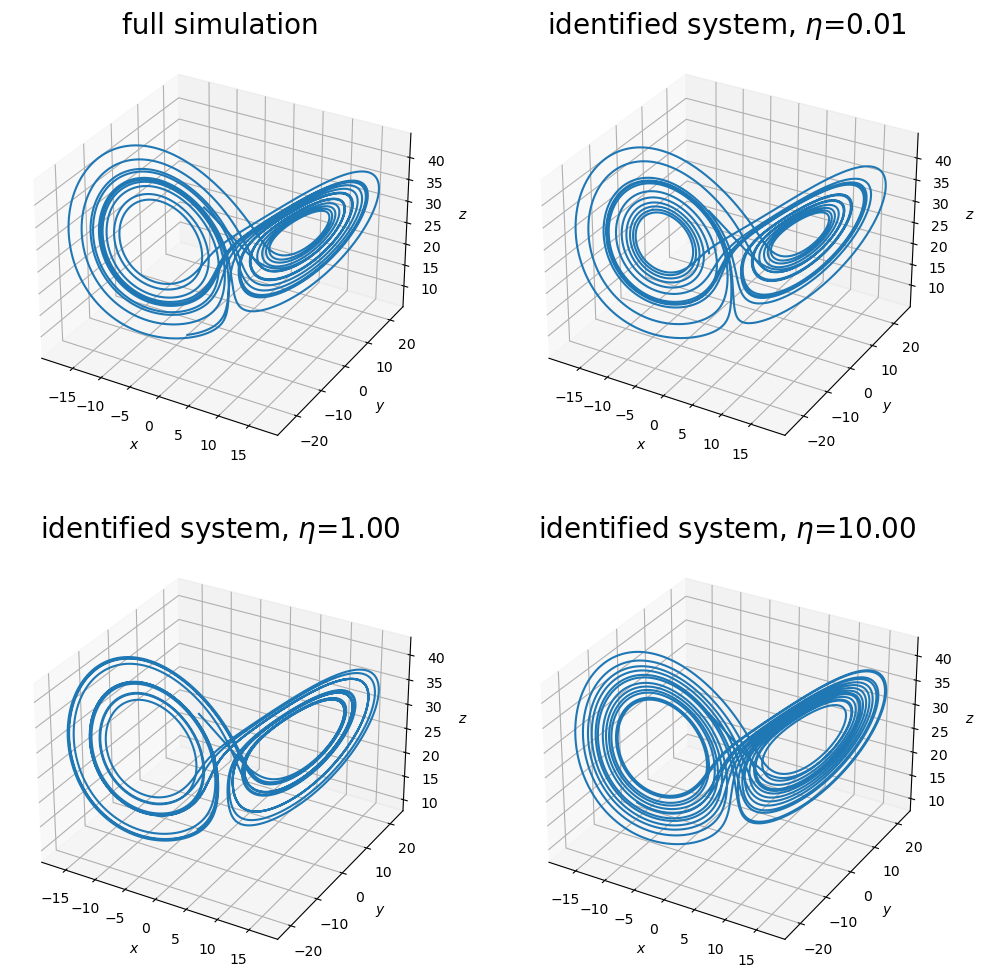

In [ ]:
# Plot results

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(221, projection="3d")
ax.plot(
    x_train[: t_sim.size, 0],
    x_train[: t_sim.size, 1],
    x_train[: t_sim.size, 2],
)
plt.title("full simulation",fontsize = 20)
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

model_idx = 2
ax = fig.add_subplot(222, projection="3d")
ax.plot(x_sim[model_idx][:, 0], x_sim[model_idx][:, 1], x_sim[model_idx][:, 2])
plt.title(f"identified system, $\eta$={noise_levels[model_idx]:.2f}",fontsize = 20)
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

model_idx = 4
ax = fig.add_subplot(223, projection="3d")
ax.plot(x_sim[model_idx][:, 0], x_sim[model_idx][:, 1], x_sim[model_idx][:, 2])
plt.title(f"identified system, $\eta$={noise_levels[model_idx]:.2f}",fontsize = 20)
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

model_idx = 5
ax = fig.add_subplot(224, projection="3d")
ax.plot(x_sim[model_idx][:, 0], x_sim[model_idx][:, 1], x_sim[model_idx][:, 2])
plt.title(f"identified system, $\eta$={noise_levels[model_idx]:.2f}",fontsize = 20)
ax.set(xlabel="$x$", ylabel="$y$", zlabel="$z$")

fig.show()

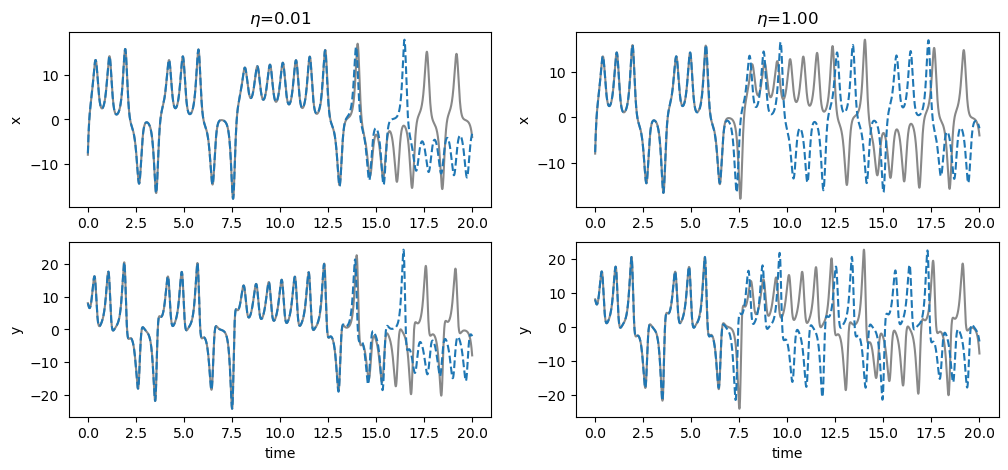

In [ ]:
# Plot results

fig = plt.figure(figsize=(12, 5))
model_idx = 2
ax = fig.add_subplot(221)
ax.plot(t_sim, x_train[: t_sim.size, 0], color='#888888')
ax.plot(t_sim, x_sim[model_idx][:, 0], "--")
plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(223)
ax.plot(t_sim, x_train[: t_sim.size, 1], color='#888888')
ax.plot(t_sim, x_sim[model_idx][:, 1], "--")
plt.xlabel("time")
plt.ylabel("y")

model_idx = 4
ax = fig.add_subplot(222)
ax.plot(t_sim, x_train[: t_sim.size, 0], color='#888888')
ax.plot(t_sim, x_sim[model_idx][:, 0], "--")
plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(224)
ax.plot(t_sim, x_train[: t_sim.size, 1], color='#888888')
ax.plot(t_sim, x_sim[model_idx][:, 1], "--")
plt.xlabel("time")
plt.ylabel("y")

fig.show()

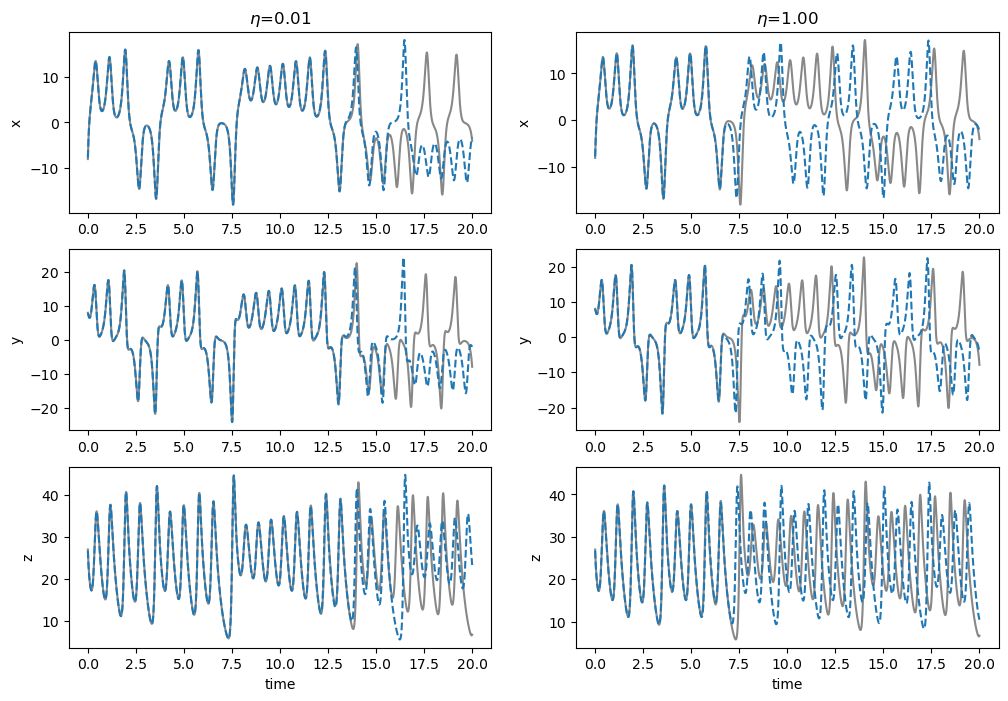

In [ ]:
fig = plt.figure(figsize=(12, 8))
model_idx = 2

ax = fig.add_subplot(321)
ax.plot(t_sim, x_train[: t_sim.size, 0], color='#888888')
ax.plot(t_sim, x_sim[model_idx][:, 0], "--")
plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(323)
ax.plot(t_sim, x_train[: t_sim.size, 1], color='#888888')
ax.plot(t_sim, x_sim[model_idx][:, 1], "--")
plt.ylabel("y")

ax = fig.add_subplot(325)
ax.plot(t_sim, x_train[: t_sim.size, 2], color='#888888')
ax.plot(t_sim, x_sim[model_idx][:, 2], "--")
plt.xlabel("time")
plt.ylabel("z")

model_idx = 4
ax = fig.add_subplot(322)
ax.plot(t_sim, x_train[: t_sim.size, 0], color='#888888')
ax.plot(t_sim, x_sim[model_idx][:, 0], "--")
plt.title(f"$\eta$={noise_levels[model_idx]:.2f}")
plt.ylabel("x")

ax = fig.add_subplot(324)
ax.plot(t_sim, x_train[: t_sim.size, 1], color='#888888')
ax.plot(t_sim, x_sim[model_idx][:, 1], "--")
plt.ylabel("y")

ax = fig.add_subplot(326)
ax.plot(t_sim, x_train[: t_sim.size, 2], color='#888888')
ax.plot(t_sim, x_sim[model_idx][:, 2], "--")
plt.xlabel("time")
plt.ylabel("z")

fig.show()

Error vs. time for sparse identified systems generated from data with increasing sensor noise η. This error corresponds to the difference between solid black and dashed red curves above. Sensor noise values are η ∈ {0.0001, 0.001, 0.01, 0.1, 1.0, 10.0}.

(1e-08, 10000.0)

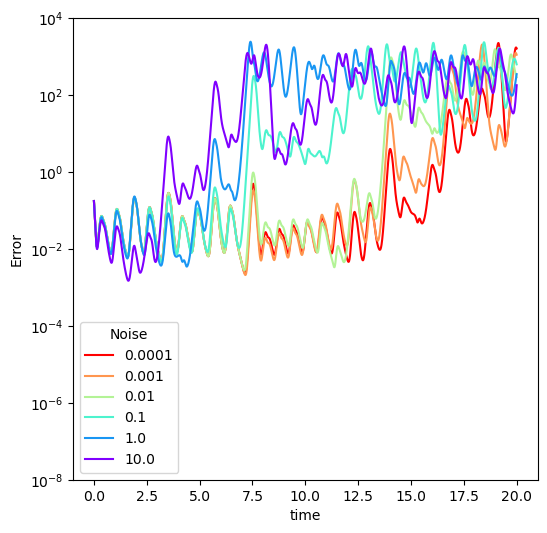

In [ ]:
colors = rainbow(np.linspace(1, 0, len(models)))

fig,axs = plt.subplots(1, 1, figsize=(6, 6))
for i, x in enumerate(x_sim):
    axs.semilogy(
        t_sim,
        np.sum((x - x_train[: t_sim.size]) ** 2, axis=1),
        color=colors[i],
        label=noise_levels[i],
    )
axs.set(xlabel="time",ylabel="Error")
axs.legend(title="Noise")
axs.set_ylim(1e-8, 1e4)

## Logistic map (Discrete time example)

The dynamics of the **logistic map** are described by

$$ x_{k+1} = \mu x_k(1-x_k) + \eta_k, $$

where $\mu$ is the bifurcation parameter and $\eta_k\sim N(0, 10^{-3})$ is the noise with magnitede 0.025.

Note that the parameter, $\mu$, in these examples is embedded in the dynamics as a variable

$$ \begin{aligned} \dot{\mathbf{x}} &= \mathbf{f}(\mathbf{x};\mu) \\ \dot\mu &= 0. \end{aligned} $$

We consider 10 different values of $\mu$; $\mu\in\{2.5,  2.75, 3, 3.25, 3.5, 3.75, 3.8, 3.85, 3.9, 3.95\}$.

In [ ]:
# Generate training data

N = 1000
mus = [2.5, 2.75, 3, 3.25, 3.5, 3.75, 3.8, 3.85, 3.9, 3.95]
eps = 0.025
x = [np.zeros((N, 2)) for i in range(len(mus))]
for i, mu in enumerate(mus):
    x[i][0] = [0.5, mu]
    for k in range(1, N):
        x[i][k, 0] = np.maximum( # min because the data has to e in [0,1]
            np.minimum( 
                mu * x[i][k - 1, 0] * (1 - x[i][k - 1, 0])
                + eps * np.random.randn(),
                1.0,
            ),
            0.0,
        )
        x[i][k, 1] = mu # this is specific for biforcation parameters, they need to be explicit in the matrix
x_train = x

when fitting the model we need to check `discrete_time=True`

In [ ]:
# Fit the model

optimizer = ps.STLSQ(threshold=0.1)
library = ps.PolynomialLibrary(degree=5)
model = ps.SINDy(
    optimizer=optimizer, 
    feature_library=library, 
    discrete_time=True
)
model.fit(x_train, multiple_trajectories=True)
model.print()

(x0)[k+1] = 1.000 x0[k] x1[k] + -1.000 x0[k]^2 x1[k]
(x1)[k+1] = 1.000 x1[k]


we generate data from the identified model and the model with noise to see the what model has been learned and the difference from raw data

In [ ]:
# Generate test data

mus = np.arange(1, 4, 0.01)
x_test = np.zeros((mus.size * N, 2))
idx = 0
for mu in mus:
    xold = 0.5
    for i in range(N):
        xnew = np.maximum(
            np.minimum(
                mu * xold - mu * xold ** 2 + eps * np.random.randn(), 1.0
            ),
            0.0,
        )
        xold = xnew
    xss = xnew # this is done so that the sequrnce starts from a random point
    for i in range(N):
        xnew = np.maximum(
            np.minimum(
                mu * xold - mu * xold ** 2 + eps * np.random.randn(), 1.0
            ),
            0.0,
        )
        xold = xnew
        x_test[idx, 0] = xnew
        x_test[idx, 1] = mu
        idx += 1
        if np.abs(xnew - xss) < 0.001:
            break
x_test = x_test[:idx]

In [ ]:
# Simulate on test data

x_sim = np.zeros((mus.size * N, 2))
idx = 0
for mu in mus:
    xss = model.simulate([0.5, mu], N)[-1]
    stop_condition = lambda x: np.abs(x[0] - xss[0]) < 0.001
    x = model.simulate(xss, N, stop_condition=stop_condition)
    idx_new = idx + x.shape[0]
    x_sim[idx:idx_new] = x
    idx = idx_new
x_sim = x_sim[:idx]

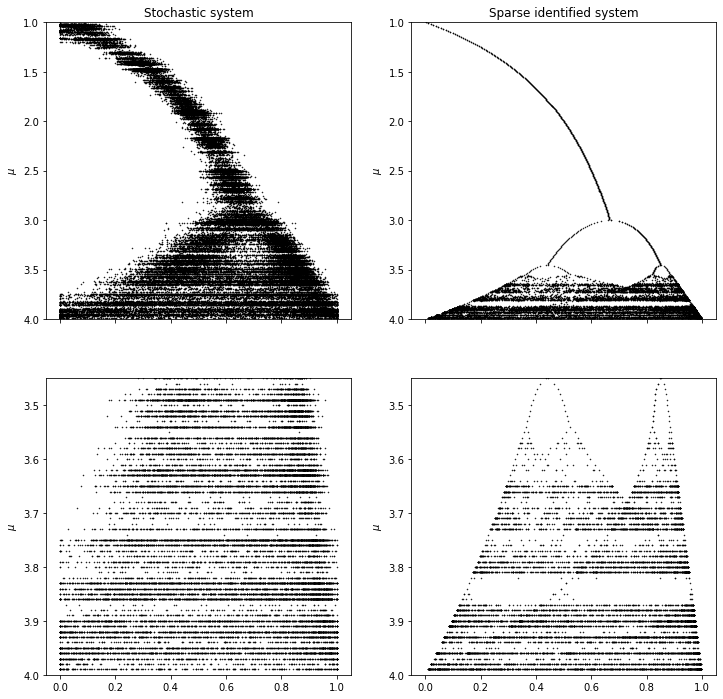

In [ ]:
# Plot results

fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharex=True)

axs[0, 0].plot(x_test[:, 0], x_test[:, 1], "k.", markersize=1)
axs[0, 0].set(
    title="Stochastic system",
    ylabel="$\mu$",
    ylim=[4, 1]
)

axs[1, 0].plot(x_test[:, 0], x_test[:, 1], "k.", markersize=1)
axs[1, 0].set(ylabel="$\mu$", ylim=[4, 3.45])

axs[0, 1].plot(x_sim[:, 0], x_sim[:, 1], "k.", markersize=1)
axs[0, 1].set(
    title="Sparse identified system",
    ylabel="$\mu$",
    ylim=[4, 1]
)

axs[1, 1].plot(x_sim[:, 0], x_sim[:, 1], "k.", markersize=1)
axs[1, 1].set(ylabel="$\mu$", ylim=[4, 3.45])

fig.show()